**Домашнее задание**

Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:

изменение слоёв и их количества;

изменение метода оптимизации;

изменение процесса обучения;


**Подключение библиотек**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch import optim

import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms

**Загрузка данных**

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                              train=True,
                                              transform=transforms.ToTensor(), 
                                              download=True)


image, label = train_dataset[0]
print(image.size())
print(label)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


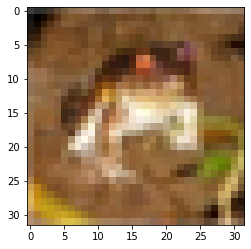

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
     

In [5]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=50,
                                          shuffle=False)
     

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

**Создание и обучение нейронной сети**

In [7]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)


In [9]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.035
Epoch [2/5]. Step [1/782]. Loss: 0.032
Epoch [2/5]. Step [301/782]. Loss: 0.032
Epoch [2/5]. Step [601/782]. Loss: 0.031
Epoch [3/5]. Step [1/782]. Loss: 0.033
Epoch [3/5]. Step [301/782]. Loss: 0.030
Epoch [3/5]. Step [601/782]. Loss: 0.030
Epoch [4/5]. Step [1/782]. Loss: 0.028
Epoch [4/5]. Step [301/782]. Loss: 0.029
Epoch [4/5]. Step [601/782]. Loss: 0.029
Epoch [5/5]. Step [1/782]. Loss: 0.028
Epoch [5/5]. Step [301/782]. Loss: 0.028
Epoch [5/5]. Step [601/782]. Loss: 0.028
Training is finished!


**Выполнение предсказаний**

In [11]:
from tqdm import tqdm

In [12]:
print(outputs)

tensor([[-1.1620, -1.4351,  1.4703,  0.5386,  2.1099,  0.5912,  1.6586,  1.2081,
         -2.8105, -1.8574],
        [ 1.0693, -0.7634,  0.8139, -0.0365,  0.8999, -0.2431, -1.1290,  1.1344,
         -0.6965, -0.7949],
        [ 1.3546, -0.5941,  1.0674,  0.2823,  0.2973,  0.2599, -1.3905, -0.5942,
          1.1594, -1.2059],
        [-1.0422, -0.7689,  0.4020,  1.5410,  0.4352,  1.5535,  1.0549, -0.4389,
         -0.8882, -1.3914],
        [-0.0551, -0.3519,  0.7535,  0.7247,  0.9316,  1.0052, -0.1212,  0.2983,
         -0.8361, -1.5516],
        [-1.1238, -0.9812,  0.9841,  0.8188,  1.9207,  0.8063,  1.3869,  1.0681,
         -2.6863, -1.6953],
        [-0.7609, -1.4175,  1.2324,  0.5779,  1.4481,  0.6057,  0.9729,  0.7301,
         -1.7678, -1.5565],
        [-0.1000, -2.2314,  1.8743, -0.1995,  2.1596,  0.0906,  0.3271,  2.0943,
         -2.1088, -1.6607],
        [ 0.0452,  1.2937, -0.4797,  0.3454, -0.6316,  0.1655, -0.3801, -0.8179,
          0.8979,  0.4688],
        [-0.1087,  

In [13]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([4, 7, 0, 5, 5, 4, 4, 4, 1, 1, 4, 8, 8, 6, 2, 4])

In [14]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['frog' 'car' 'cat' 'frog' 'dog' 'deer' 'deer' 'horse' 'plane' 'car' 'dog'
 'ship' 'plane' 'frog' 'truck' 'deer']
['deer' 'horse' 'plane' 'dog' 'dog' 'deer' 'deer' 'deer' 'car' 'car'
 'deer' 'ship' 'ship' 'frog' 'bird' 'deer']
Accuracy is 0.4375


Accuracy = 0.4375 при исходных условиях 

**Изменение слоёв и их количества**

In [15]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim) # добавлено
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim) 
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x) # добавлено
        x = F.relu(x) # добавлено
        x = self.fc5(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.relu(x) # добавлено
        x = self.fc5(x) # добавлено
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

**Изменение метода оптимизации. Изменение процесса обучения**

Изменили SGD на Adagrad

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.001)

Увеличили количество эпох с 5 до 15. Для обучения используем CUDA

In [17]:
num_epochs = 15
with torch.cuda.device("cuda:0"):
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_items = 0.0


        for i, data in enumerate(train_loader):
            inputs, labels = data[0], data[1]

             # Обнуляем градиент
            optimizer.zero_grad()
            # Делаем предсказание
            outputs = net(inputs)
            # Рассчитываем лосс-функцию
            loss = criterion(outputs, labels)
            # Делаем шаг назад по лоссу
            loss.backward()
            # Делаем шаг нашего оптимайзера
            optimizer.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            running_items += len(labels)
            if i % 500 == 0:    # печатаем каждые 500 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                      f'Step [{i + 1}/{len(train_loader)}]. ' \
                      f'Loss: {running_loss / running_items:.3f}')
                running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/15]. Step [1/782]. Loss: 0.036
Epoch [1/15]. Step [501/782]. Loss: 0.031
Epoch [2/15]. Step [1/782]. Loss: 0.030
Epoch [2/15]. Step [501/782]. Loss: 0.028
Epoch [3/15]. Step [1/782]. Loss: 0.034
Epoch [3/15]. Step [501/782]. Loss: 0.027
Epoch [4/15]. Step [1/782]. Loss: 0.027
Epoch [4/15]. Step [501/782]. Loss: 0.026
Epoch [5/15]. Step [1/782]. Loss: 0.024
Epoch [5/15]. Step [501/782]. Loss: 0.026
Epoch [6/15]. Step [1/782]. Loss: 0.025
Epoch [6/15]. Step [501/782]. Loss: 0.026
Epoch [7/15]. Step [1/782]. Loss: 0.021
Epoch [7/15]. Step [501/782]. Loss: 0.025
Epoch [8/15]. Step [1/782]. Loss: 0.027
Epoch [8/15]. Step [501/782]. Loss: 0.025
Epoch [9/15]. Step [1/782]. Loss: 0.025
Epoch [9/15]. Step [501/782]. Loss: 0.025
Epoch [10/15]. Step [1/782]. Loss: 0.026
Epoch [10/15]. Step [501/782]. Loss: 0.024
Epoch [11/15]. Step [1/782]. Loss: 0.024
Epoch [11/15]. Step [501/782]. Loss: 0.024
Epoch [12/15]. Step [1/782]. Loss: 0.024
Epoch [12/15]. Step [501/782]. Loss: 0.024
Epoch [13/

In [18]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([9, 4, 7, 0, 6, 1, 6, 6, 4, 6, 9, 8, 7, 1, 8, 0])

In [19]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['truck' 'deer' 'horse' 'plane' 'bird' 'car' 'cat' 'frog' 'deer' 'frog'
 'car' 'ship' 'horse' 'car' 'ship' 'ship']
['truck' 'deer' 'horse' 'plane' 'frog' 'car' 'frog' 'frog' 'deer' 'frog'
 'truck' 'ship' 'horse' 'car' 'ship' 'plane']
Accuracy is 0.75


При изменении исходной сети и параметров её обучения удалось увеличить accuracy с 0.42 до 0.75